# ANALYSIS of MOST POPULAR TV Series through Web scraping ROTTEN TOMATOES : ARROW,DAREDEVIL,FLASH,GAME OF THRONES
### FUN FACTS!!!!!!
### Just an  analysis to find some details about four premier action/Sci-fi TV series 
### Is Game Of thrones Season 8 in the path of becoming the highest liked season of all times among these four series? 
### Did Flash really became the least likely appreciated series among the above four TV Series?
### IS Marvel's Daredevil  catching a constant and high percentage of liked viewers? Or is the appeal of the series is going down day by day?
### Will there be a chance of Flash Season 6 on it's way?

In [16]:
import requests
import re
from bs4 import BeautifulSoup as BS
def comicseries(c,ind):
    fl = str('flash')
    marvelHeroes = ['arrow','daredevil',fl,'game_of_thrones']
    rotTomtoes = requests.get('https://www.rottentomatoes.com/tv/' + str(marvelHeroes[ind]) +'/s0'+ str(c))
    Text = BS(rotTomtoes.text,'html5lib')
    c+=1
    return Text
    

In [17]:
import json,re,pandas as pd
from IPython.display import display
finalDT= pd.DataFrame()
end=False
count=1
filmNo=1
ind=0
audienceScore=pd.Series()
tvshowName = pd.Series()
DTFrame=pd.DataFrame()
tvSeriesNo =pd.Series()
while end == False:
    if str(comicseries(count,ind)).find('Sorry, please try again later.') != -1:
        ind+=1
        count=1
        if ind >3:
            break
        continue
    if ind ==3 and count==8:
        show = comicseries(count,ind).find('a',attrs={'id':'tvPosterLink'}).text.replace('\n','').strip()
        tvshowName = tvshowName.append(pd.Series(show))
        tvSeriesNo = tvSeriesNo.append(pd.Series('Season No: '+ str(count)))
        k = comicseries(count,ind).find('div',attrs={'class':'meter-value superPageFontColor'}).find('span',attrs={'class':'superPageFontColor'}).text
        audienceScore = audienceScore.append(pd.Series(k))
        break
    else:
        show = comicseries(count,ind).find('a',attrs={'id':'tvPosterLink'}).text.replace('\n','').strip()
        tvshowName = tvshowName.append(pd.Series(show))
        tvSeriesNo = tvSeriesNo.append(pd.Series('Season No: '+ str(count)))
        k = comicseries(count,ind).find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        audienceScore = audienceScore.append(pd.Series(k))
    count+=1
DTFrame =pd.concat([tvSeriesNo,tvshowName,audienceScore],axis=1)
DTFrame.reset_index(drop=True,inplace=True)
DTFrame.columns=['Series Number','TV_Series_Name','AudienceScore']
DTFrame['AudienceScore']= DTFrame['AudienceScore'].replace('%','',regex=True)
DTFrame['AudienceScore'] = DTFrame['AudienceScore'].astype('int')



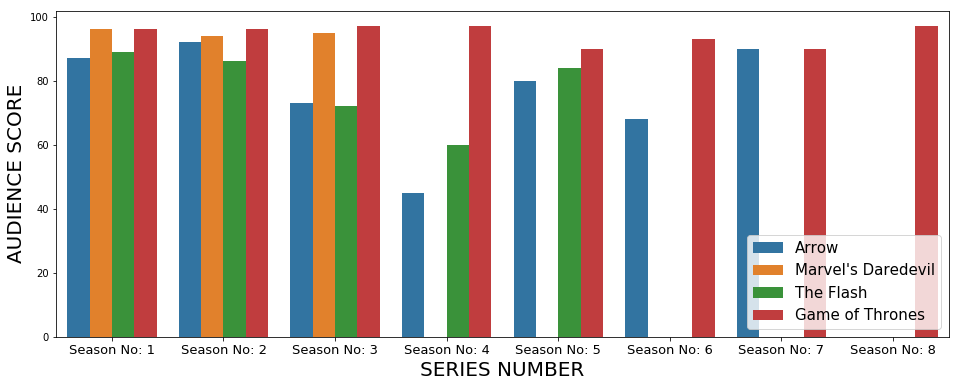

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.barplot(x=DTFrame['Series Number'],y=DTFrame['AudienceScore'],hue=DTFrame['TV_Series_Name'])
plt.legend(loc='lower right',fontsize=15)
plt.xlabel('SERIES NUMBER',fontsize=20)
plt.ylabel('AUDIENCE SCORE',fontsize=20)
plt.xticks(fontsize=13)
plt.show()


# INFERENCE:
### ARROW: Season 2 and Season 7 are the most liked series and Season 4 is the worst of all. Probably may be the content.
### DAREDEVIL: All seasons are upto mark .Season 2 is slightly less liked but rest two seasons are far intricately  watched
### FLASH: Season 1 as usual is the best of the lot  and Season 4 is the less liked series among all

### Game of Thrones: Phew! All seasons are above par. But , Season 3 and 4 is the best of the lot. A little ahead of the  others, but 

### if I  may say,Season 8 is already the highest rated among all the other seasons..  But wait ,Game of thrones is the best overall rated TV Series among the four .Wait and watch!!!!!!

### Since FLash Season 5 is highly liked by the audience, we may see Season 6 soon!

# ANALYSIS 2: Which Genre  have how much audeince score  in the Best 100 Movies from 2018

In [12]:
import requests
import re,pandas as pd
from bs4 import BeautifulSoup as soup
from urllib import request
from collections import Counter
from IPython.display import display
def fn1():
    movieList = requests.get('https://www.rottentomatoes.com/top/bestofrt/?year=2018')
    text = soup(movieList.text,'html5lib')
    topMovies = text.find_all('a',attrs={'class':'unstyled articleLink','href':True})
    k = [('https://www.rottentomatoes.com' + each['href']) for each in topMovies if re.search('/m',str(each)) if re.search('^/m',each['href']) ]
    genreDTFrame=pd.DataFrame()
    genreList=[]
    AudienceScoreList=[]
    audi=[]
    for each in k:
        i=request.urlopen(each)
        result = soup(i,'html5lib')
        nameTag = result.find_all('div',attrs={'class':'meta-value'})
        audiScr = result.find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        AudienceScoreList.append(audiScr.replace('%',''))
        [genreList.append(each.text.replace(' ','').replace('\n','')) for each in nameTag if str(each).find('genres')>-1]
    #print(genreList,type(genreList))
    return (AudienceScoreList,genreList)

    

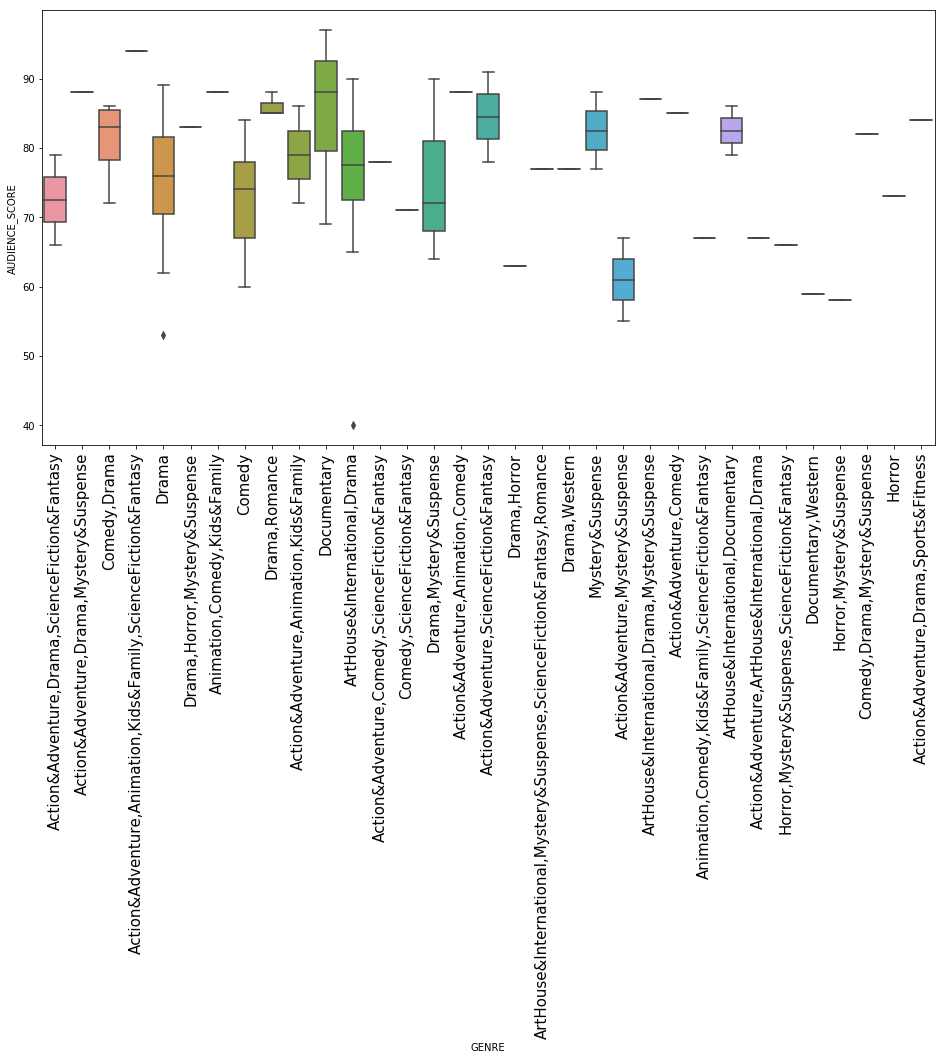

In [13]:
def fn2():
    import matplotlib.pyplot as plt
    import seaborn as sns
    from IPython.display import display
    audiscore,genre= fn1()
    audiPDSeries=pd.Series(audiscore)
    genrePDSeries = pd.Series(genre)
    DTFrame = pd.concat([genrePDSeries,audiPDSeries],axis=1)
    DTFrame.columns=['GENRE','AUDIENCE_SCORE']
    DTFrame.AUDIENCE_SCORE = DTFrame.AUDIENCE_SCORE.astype('int')
    #display(DTFrame)
    plt.figure(figsize=(16,8))
    sns.boxplot(x=DTFrame['GENRE'],y=DTFrame['AUDIENCE_SCORE'])
    plt.xticks(rotation=90,fontsize=15)
    plt.show()
fn2()

### The below analysis is made to find out the percentage of audience score for 'Marvel Studios','Paramount Pictures','Warner ros. Pictures ','Universal Pictures','Walt Disney Pictures' over a span from 2012 to 2018

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup as sp
import requests
from IPython.display import display

In [2]:
def PlotSeries(year):
    rot = 'https://www.rottentomatoes.com'
    scrapedData= requests.get('https://www.rottentomatoes.com/top/bestofrt/?year='+year)
    #print(year)
    filmNames = sp(scrapedData.text,'html5lib')
    k = filmNames.find_all('a',attrs={'class':'unstyled articleLink'})
    nameList=[]
    totalDTFrame=pd.DataFrame()
    for each in k:
        if each['href'].startswith('/m'):
            nameList.append(rot+each['href'])
    StudioComparison=['Marvel Studios','Paramount Pictures','Warner Bros. Pictures','Universal Pictures','Walt Disney Pictures']
    AudienceScoreList=[]
    from urllib import request
    for each in nameList:
        Flag=False
        try:
            urlText = request.urlopen(each)
            soupText = sp(urlText,'html5lib')
        except:
            pass
        
        
        audiScr = soupText.find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        DTFrame=pd.DataFrame()
        try:
            k = soupText.find('a',attrs={'target':'movie-studio'}).text.strip()
            j= soupText.find('h1',attrs={'class':'title hidden-xs'}).text.strip()
            #print(j)
            if k in StudioComparison:
               # print('kk1')
                tempMovieStudio=pd.DataFrame([k])
                tempAudiScore = pd.DataFrame([audiScr])
                DTFrame=pd.concat([tempMovieStudio,tempAudiScore],axis=1)
                #display(DTFrame)
                Flag=True
        except: 
            j=soupText.find('div',attrs={'class':'meta-value'}).text.replace(' ','')
            if j in StudioComparison:
                #print('kk2')
                tempMovieStudio=pd.DataFrame([k])
                tempAudiScore = pd.DataFrame([audiScr])
                DTFrame=pd.concat([tempMovieStudio,tempAudiScore],axis=1)
                Flag=True
                #display(DTFrame)
        if Flag:
            totalDTFrame = pd.concat([totalDTFrame,DTFrame],axis=0)
    #print(totalDTFrame)
    return totalDTFrame
    #display(totalDTFrame)


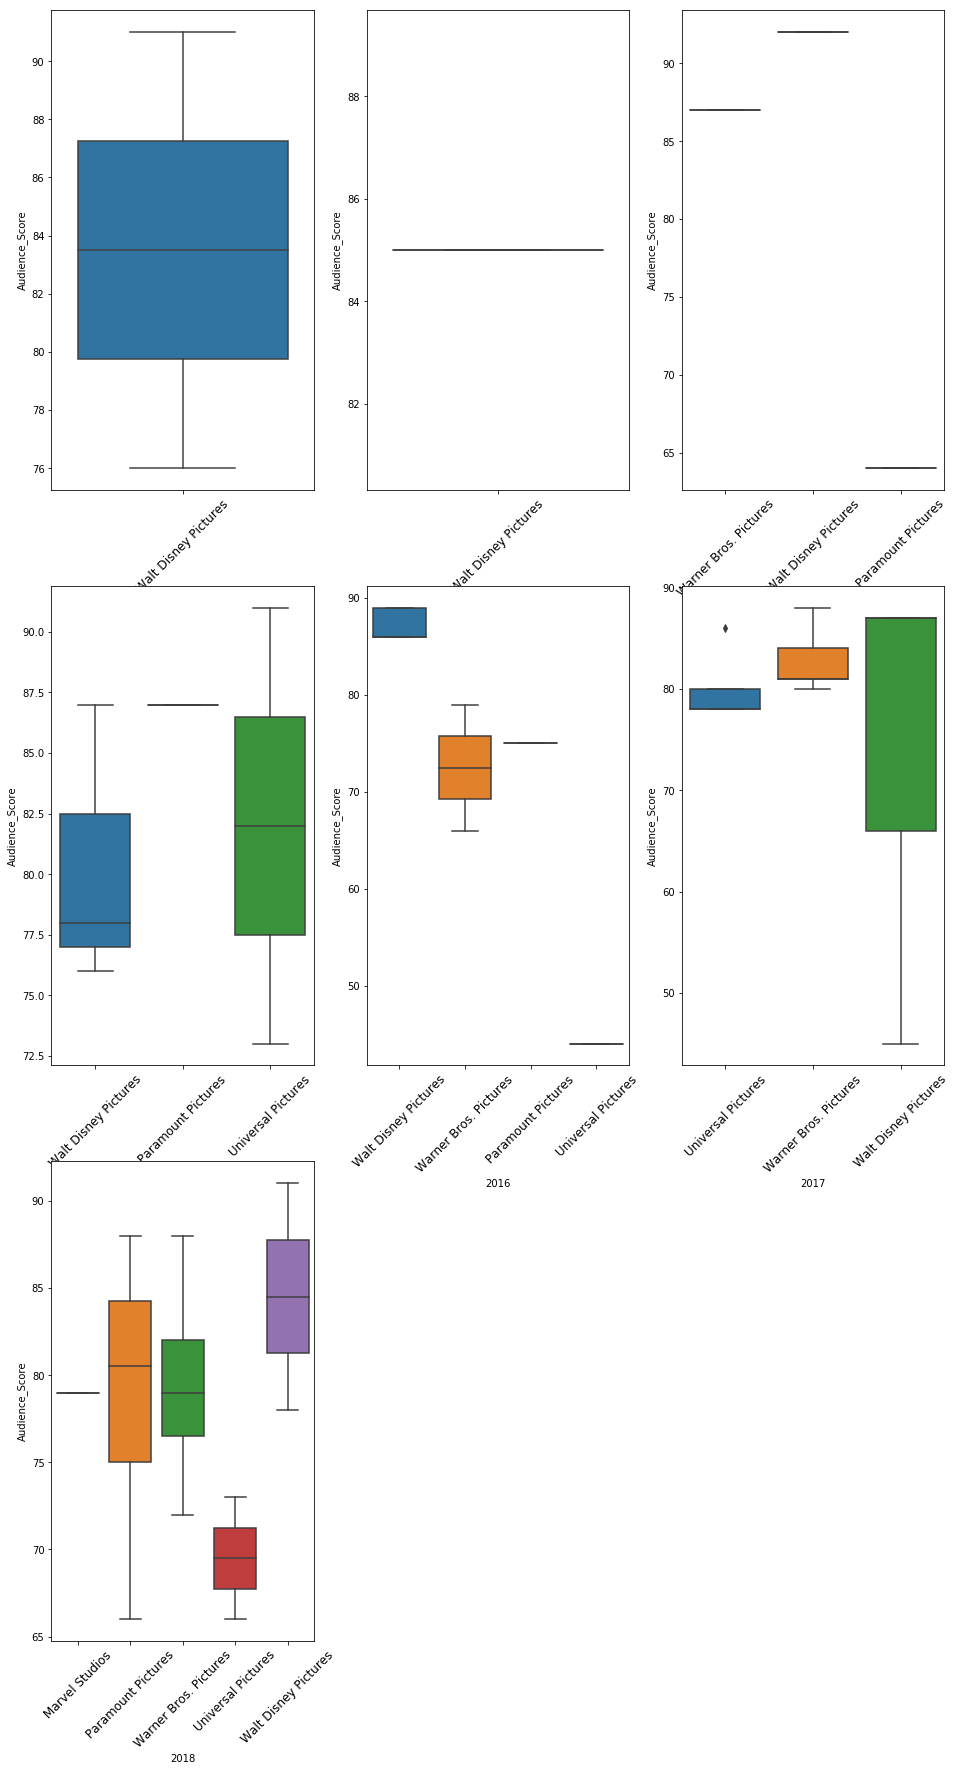

In [10]:
yearList=['0','2012','2013','2014','2015','2016','2017','2018']
fig=plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
for i in range(1,len(yearList)):
    DTFrame = PlotSeries(yearList[i])
    #print(DTFrame)
    DTFrame.columns=['Studio_Names','Audience_Score']
    DTFrame.Audience_Score = DTFrame.Audience_Score.replace('%','',regex=True).astype('int')
    ax=fig.add_subplot(3,3,i)
    ax=sns.boxplot(x=DTFrame['Studio_Names'],y=DTFrame['Audience_Score'])
    plt.xlabel(yearList[i])
    plt.xticks(fontsize=12,rotation=45)
    #plt.show()
#,  